<a href="https://colab.research.google.com/github/mmishra1092/Bike-Sharing-Demand-Prediction/blob/main/MAYANK_MISHRA_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Loading Dataset and Importing packages

In [3]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime as dt
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [4]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# upload Data Path
working_path = '/content/drive/MyDrive/Module: 4/Week_3/Capstone Project: Supervised ML: Regression/SeoulBikeData.csv'

In [6]:
# Read data
bike_data_df = pd.read_csv(working_path, encoding = 'ISO-8859-1', low_memory = False)

# Dataset Information and summary

In [8]:
# View first 5 rows of dataset
bike_data_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
# View last 5 rows of dataset
bike_data_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
# Dataset information summary
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
# Datset Unique Value
bike_data_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [36]:
# checking datset summary and features value
bike_data_df.describe()

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Dataset Preprocessing**

In [37]:
# check Duplicate
len(bike_data_df[bike_data_df.duplicated()])

0

There are no duplicate values in our dataset.

In [13]:
# Check null values
bike_data_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values in our dataset.

In [14]:
# Columns Names
bike_data_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Features Explanation and it's Data Type
*   **rented_bike_count:** This is Dependent variable and shows number of bike count per hour. Dtype is str and we convert it into datetime format.
*  **date**: Date range in the dataset is from 01/12/2017 to 30/11/2018. Dtype is str and we convert it into datetime format.
*  **hour**: In dataset hour is in digital time format. Dtype is int and we convert it into category type.
*   **seasons**: This shows four seasons present in dataset. Dtype is str.
*   **temperature**: Temperature is in celcius. Dtype is float.
*   **snowfall**: It shows amount of snowfall in cm. Dtype is float.
*   **rainfall**: It shows amount of rainfall in mm. Dtype is float.
*   **windspeed**: It shows speed of wind in m/s. Dtype is float.
*   **solar_radiation**: It shows solar radiation intensity. Dtype is float.
*   **dew_point_temp**: It tells about the temperature in the beginning of the day. Dype is float.
*   **visibility**: Is given in m. Dtype is int.
*   **humidity**: It shows humid present in air in %. Dtype is int.
*   **holiday**: It tells if its during holiday. Dtype is str.
*   **functioning_day**: It tells if the day is functioning or not. Dtype is str.

In [15]:
# Rename columns names
bike_data_df= bike_data_df.rename(columns={'Rented Bike Count':'rented_bike_count','Temperature(°C)':'temperature',
                                           'Humidity(%)':'humidity','Wind speed (m/s)':'wind_speed',
                                           'Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temp',
                                           'Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall',
                                           'Snowfall (cm)':'snowfall','Seasons':'seasons','Holiday':'holiday',
                                           'Functioning Day':'functioning_day','Hour':'hour'})

* Some column names in our dataset are in a format which python do not process 
and so we need to change the column names into relevant format for the smooth operation.

In [16]:
# Breaking date column
bike_data_df['Date'] = bike_data_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [17]:
bike_data_df['year'] = bike_data_df['Date'].dt.year
bike_data_df['month'] = bike_data_df['Date'].dt.month
bike_data_df['day'] = bike_data_df['Date'].dt.day_name()

Python read "Date" column as a object type. So we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day' as a category data type.

In [18]:
# Create a new column weekdays_weekend
bike_data_df['weekdays_weekend']=bike_data_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

For our relevance we need if a day is weekend or weekday, so we create a new column and we need to change the type from integer to category type.

In [38]:
# Number of weekdays and weekend
bike_data_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

It gives number of weekdays which is 6264 and number of weekend which is 2496.

In [19]:
#Drop 'Date','Day', and 'year' column
bike_data_df = bike_data_df.drop(columns=['Date','day','year'],axis=1)

In our dataset we have data of only one year, So we drop it.

In [20]:
# Check top 5 rows after preprocessing
bike_data_df.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [21]:
# Check last 5 rows after preprocessing
bike_data_df.tail()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekdays_weekend
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8759,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


In [22]:
# Data information after creating and dropping some columns
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   dew_point_temp     8760 non-null   float64
 7   solar_radiation    8760 non-null   float64
 8   rainfall           8760 non-null   float64
 9   snowfall           8760 non-null   float64
 10  seasons            8760 non-null   object 
 11  holiday            8760 non-null   object 
 12  functioning_day    8760 non-null   object 
 13  month              8760 non-null   int64  
 14  weekdays_weekend   8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 1.0+ MB


In [24]:
# Change numerical coloumn into categorical column
col_names = ['hour','month','weekdays_weekend']
for columns in col_names:
  bike_data_df[columns]= bike_data_df[columns].astype('category')

In [25]:
# Column names after we created weekdays_weekend column.
bike_data_df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

# Exploratory Data Analysis
  *Analysing Numerical Variables*

In [26]:
# Assigning numerical columns to variables
numeric_columns = list(bike_data_df.select_dtypes(['int64','float64']).columns)
numeric_features = pd.Index(numeric_columns)
numeric_features

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

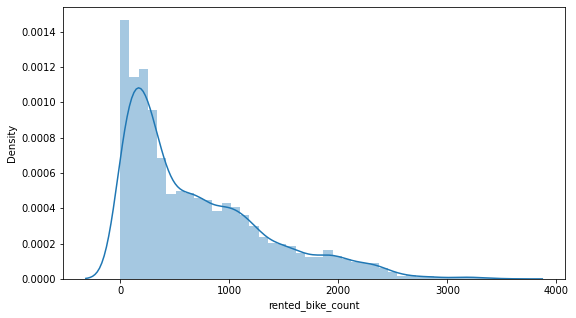

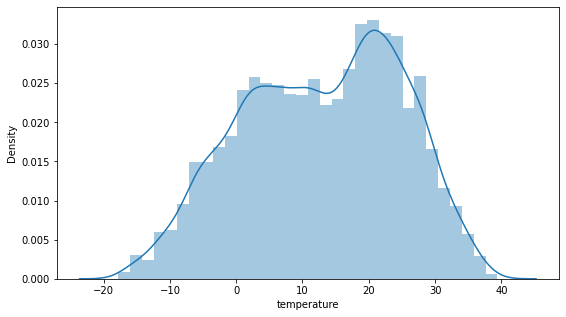

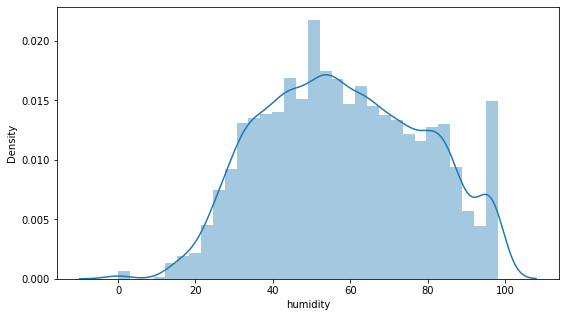

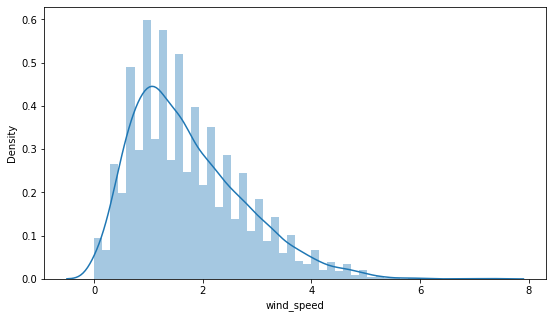

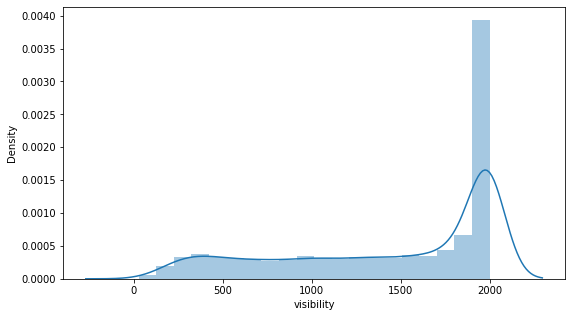

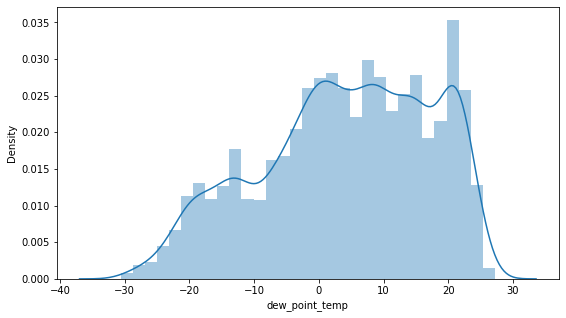

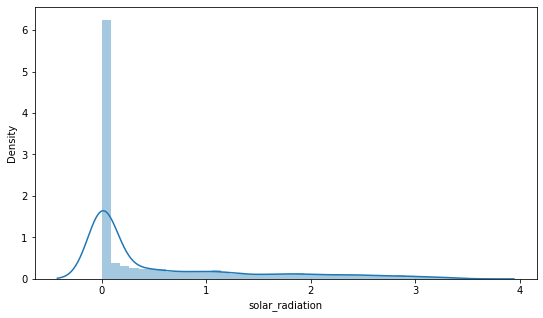

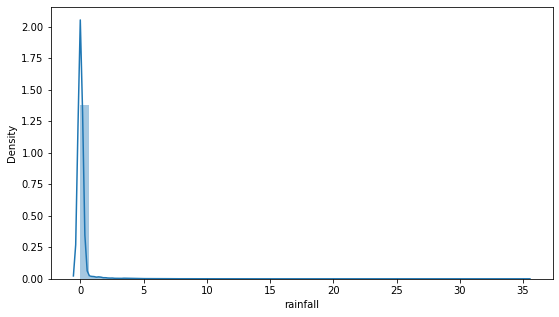

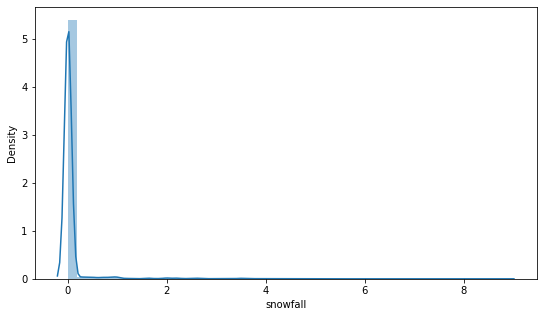

In [27]:
# Analysing distribution of all numerical variables
for col in numeric_features:
  plt.figure(figsize=(9,5))
  sns.distplot(x=bike_data_df[col])
  plt.xlabel(col)
plt.show()

## Categorical variables analysis with respect to dependent variable

[Text(0.5, 1.0, 'Monthly Count of Rented Bike')]

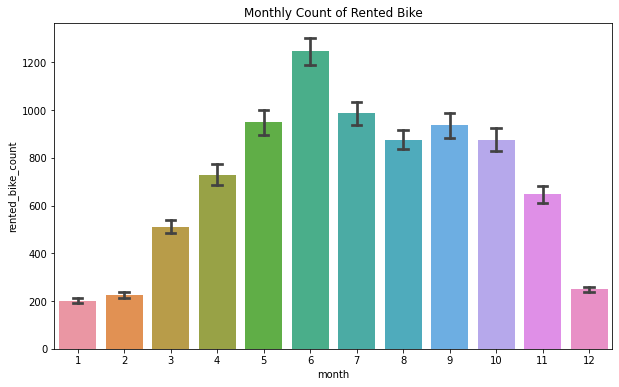

In [28]:
# Dependent variable(rented_bike_count) plot with respect to Month
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bike_data_df,x='month',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Monthly Count of Rented Bike')

**Insight**: From above plot we can see that from 5th month till 10th month the demand is high as compared to the months which has winter season.

[Text(0.5, 1.0, 'Count of Bikes on Weekdays & Weekend')]

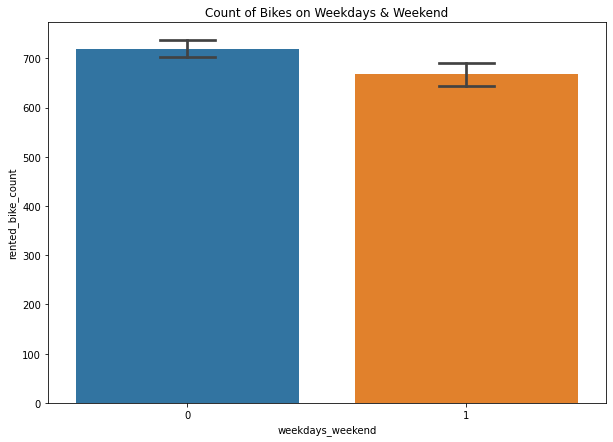

In [29]:
# Plot count of bike on weekdays and weekend
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=bike_data_df,x='weekdays_weekend',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Bikes on Weekdays & Weekend')

[Text(0.5, 1.0, 'Count of Bikes on Hourly Basis')]

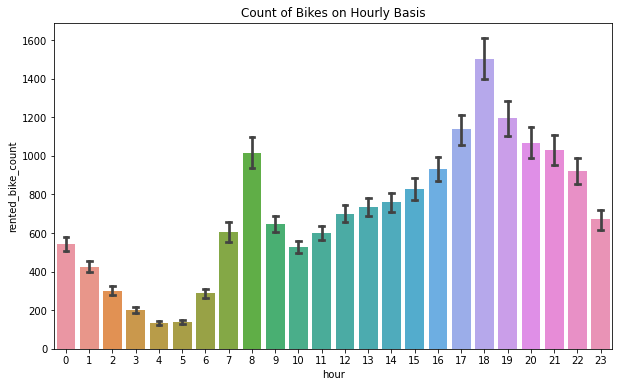

In [30]:
# Plot count of bike on hourly basis
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bike_data_df,x='hour',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Bikes on Hourly Basis')

**Insight**: We can clearly see from above plot that bike count is more during the evening time.

[Text(0.5, 1.0, 'Count of Bikes on Hourly Basis on Weekdays & Weekend')]

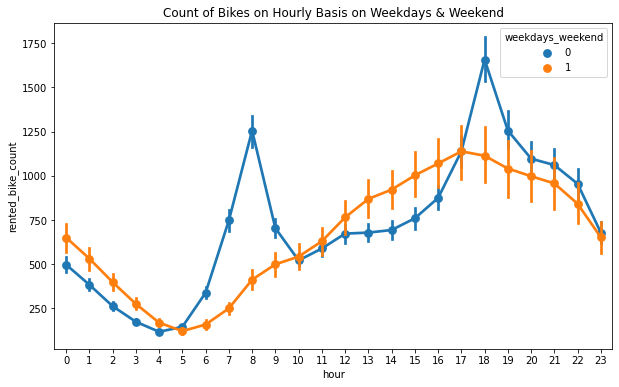

In [31]:
# plotting comparison of bike count on hourly basis on weekdays and weekend
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=bike_data_df,x='hour',y='rented_bike_count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Bikes on Hourly Basis on Weekdays & Weekend')

**Insight**: We can see that bike count is more on the weekend and peek time of demand is in the evening. 

[Text(0.5, 1.0, 'Count of Bikes as per Seasons')]

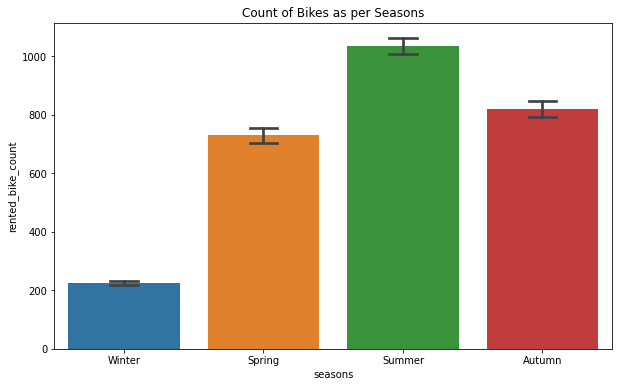

In [32]:
# Plotting bike count as per seasons
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bike_data_df,x='seasons',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Bikes as per Seasons')

**Insight**: The above plot concludes that in summer the count is more than 1000 but in winters the count is around 200 which says that in winters the demand reduces drastically.

[Text(0.5, 1.0, 'Count of Bikes as per Seasons on Hourly Basis')]

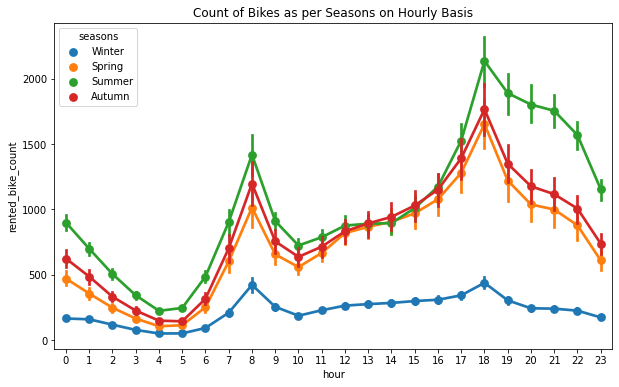

In [33]:
# Comparing bike count as per seasons on hourly basis
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=bike_data_df,x='hour',y='rented_bike_count',hue='seasons',ax=ax)
ax.set(title='Count of Bikes as per Seasons on Hourly Basis')

**Insight**: In above plot we can see that in summer the count of bike increases from 7:00am to 9:00 am and in the evening 5pm to 7pm which is almost same as autumn and spring. But in winters it's very low.

[Text(0.5, 1.0, 'Count of Bikes as per Seasons on Hourly Basis')]

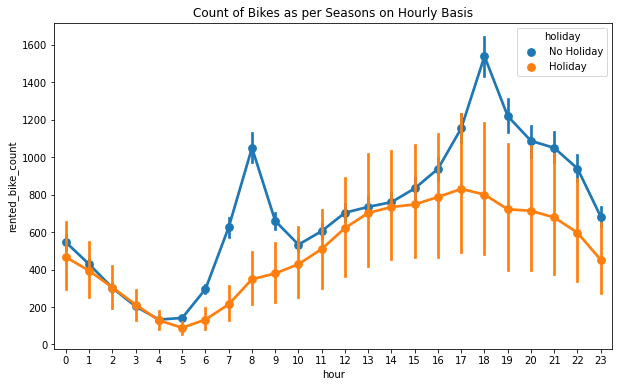

In [34]:
# Comparing bike count on hourly basis on Holiday
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=bike_data_df,x='hour',y='rented_bike_count',hue='holiday',ax=ax)
ax.set(title='Count of Bikes as per Seasons on Hourly Basis')

**Insight**: In above plot we can see that demand of bikes on holidays is hight almost through out the day as compared to working days on which demand is high mostly after 6pm in the evening.

# Regression Plot:
*   It helps to visualize the linear relationship between two parameters. It also intend to add visual guide that helps to emphasize on patterns in the datset while performing EDA.

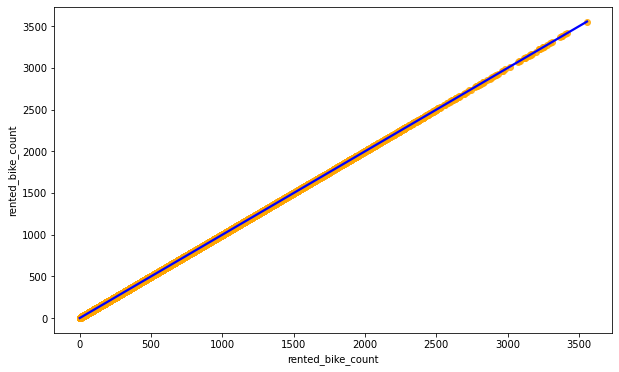

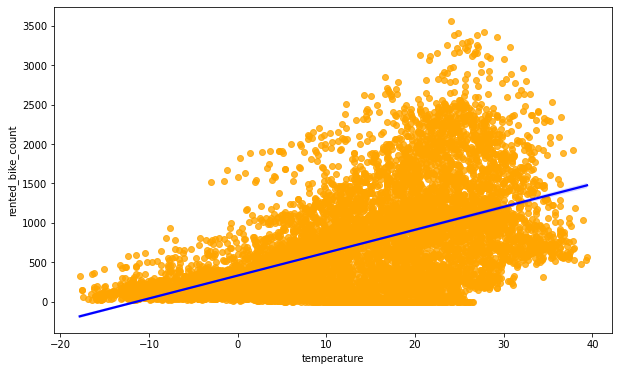

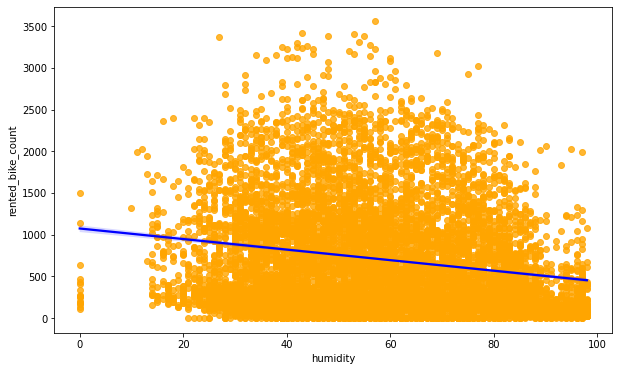

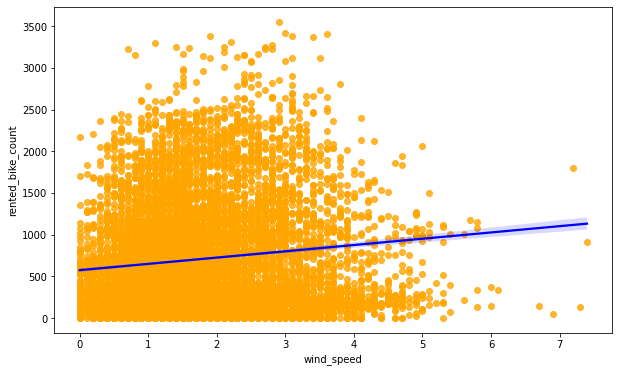

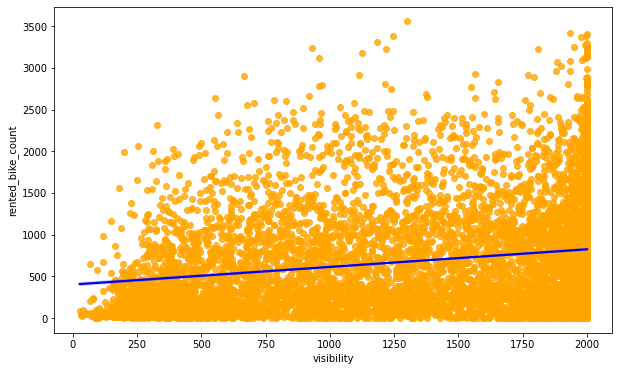

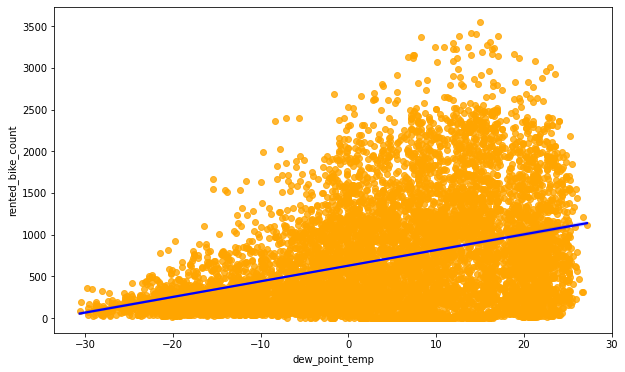

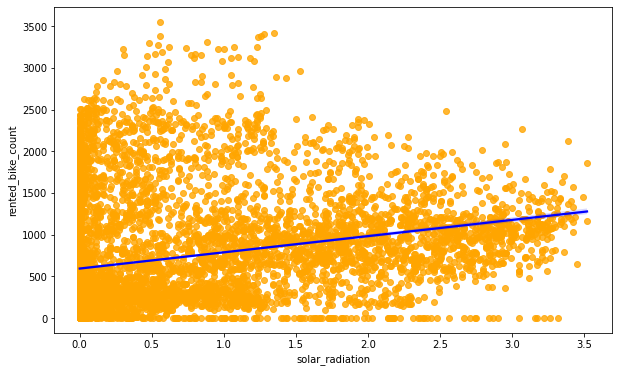

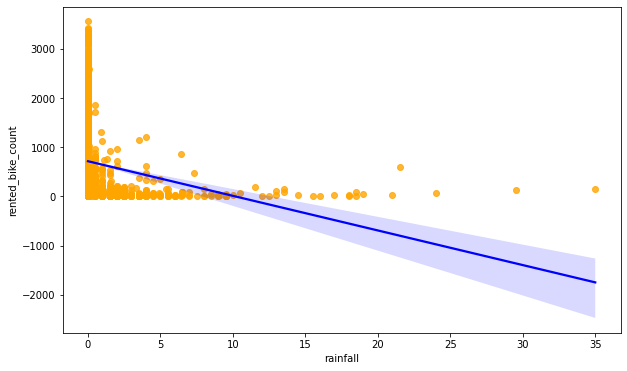

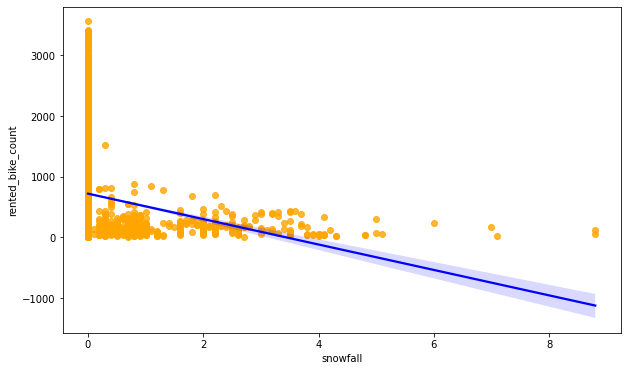

In [44]:
# Plotting regression plot for the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_data_df[col],y=bike_data_df['rented_bike_count'],scatter_kws={'color':'orange'},line_kws={'color':'blue'})

**Conclusion:** From above plot we can conclude that columns 'temp','wind_speed','visibility','dew_point_temp', and 'solar_radiation' are positively related to target or dependent variable which means bike count increase with the increase of these features.

Also 'rainfall','snowfall' and 'humidity' are negatively related to target variable which means bike count decreases with increase in these values.